<a href="https://colab.research.google.com/github/Vitorjipa22/IC-IT/blob/main/PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

In [35]:
import control as ctl
import numpy as np
import matplotlib.pyplot as plt

In [63]:
class PID:
  def __init__(self, gama = 1/8, temp_simu = 20, set_point = 1.0):

    self.gama = gama
    
    self.set_point = set_point
    self.temp_simu = temp_simu

    self.numerador = [16]
    self.denominador = [1,4,16]

    self.G_s = ctl.tf(self.numerador, self.denominador)

    self.H_s = ctl.tf([1.],[1.])
    self.C_s = ctl.tf([1], [1])

    self.T_s=ctl.feedback(self.G_s, self.H_s, sign=-1)

  def controller(self,P,I,D):

    self.P = P
    self.I = I
    self.D = D

    num_ctl = [self.P*((self.gama*self.I*self.D) + (self.I*self.D)), self.P*(self.I+(self.gama*self.D)), self.P]
    den_ctl = [self.I*self.D*self.gama, self.I,0]

    self.C_s = ctl.tf(num_ctl, den_ctl)
    self.G_s = ctl.series(self.C_s, self.G_s)

    self.T_s = ctl.feedback(self.G_s, self.H_s, sign=-1)

    self.T_mf, self.yout_mf = ctl.step_response(self.T_s, self.temp_simu)

    self.error = [self.set_point]*len(self.T_mf) - self.yout_mf

    return self.yout_mf, self.error


  def plot(self, Y, figsize = (15,7), set_point = False):
    plt.figure(figsize = figsize)
    plt.plot(self.T_mf, Y, linewidth = 1.2)
    if set_point:
      plt.plot(self.T_mf, [self.set_point]*len(self.T_mf), linewidth = 1.2)
    plt.show()

In [64]:
PID = PID()

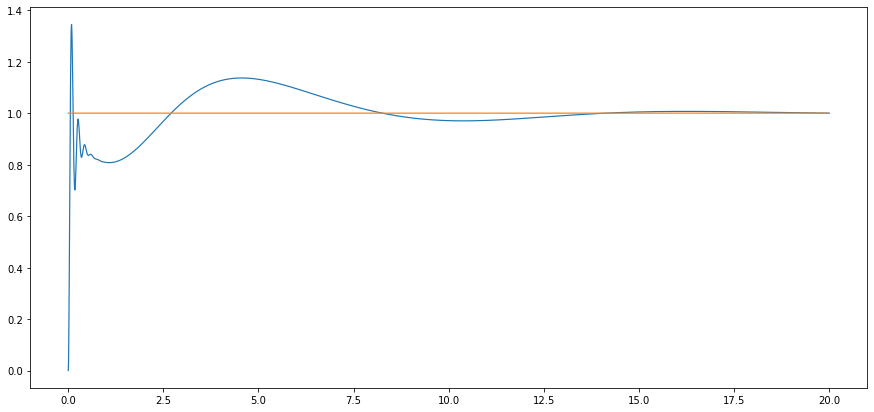

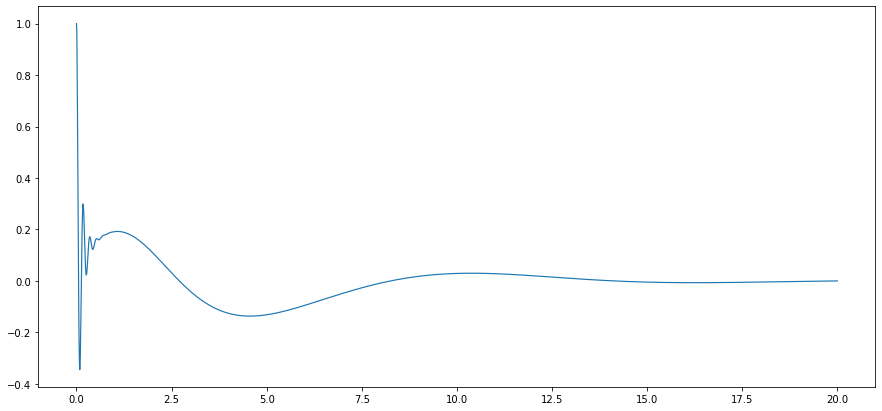

In [66]:
out, error = PID.controller(1.0,1.0,1.0)
PID.plot(out, set_point=True)
PID.plot(error)